In [19]:
from fastPLNmodels.utils import build_block_Sigma, C_from_Sigma, sample_PLN, MSE
import torch
from fastPLNmodels.models import IMPS_PLN, log_likelihood, fastPLN, fastPLNPCA, PLNmodel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else : 
    device = torch.device('cpu')
    
#device = torch.device('cpu') # think I can't use RTX A5000 right now, will check this later. 
torch.cuda.is_available()
# print('device ', device)

True

## Importation of the data

In [15]:
Y = pd.read_csv('Y_test')
O = pd.read_csv('O_test')
cov = pd.read_csv('cov_test')
true_Sigma = torch.from_numpy(pd.read_csv('true_Sigma_test').values)
true_beta = torch.from_numpy(pd.read_csv('true_beta_test').values)

## Test aggregated class

In [144]:
mypln = PLNmodel(q)
%time mypln.fit(Y,O,cov, fast = False)
print(mypln)

Fitting a PLNPCA model with importance sampling. Number of PCs:  50
Intialization ...
Initalization done


  1%|          | 9/1000 [00:04<07:30,  2.20it/s]


KeyboardInterrupt: 

Please fit the model before by calling model.fit(Y,O,covariates,N_epoch,acc)


AttributeError: 

##  Test fastPLN model

In [132]:
n = 200

Initialization ...
nb iteration to find the mode:  230
Initialization finished
Last delta: 0.07964995249291462,  reached in 25 iterations
CPU times: user 2.06 s, sys: 49.6 ms, total: 2.11 s
Wall time: 2.09 s
Last ELBO : -95.07879713605988


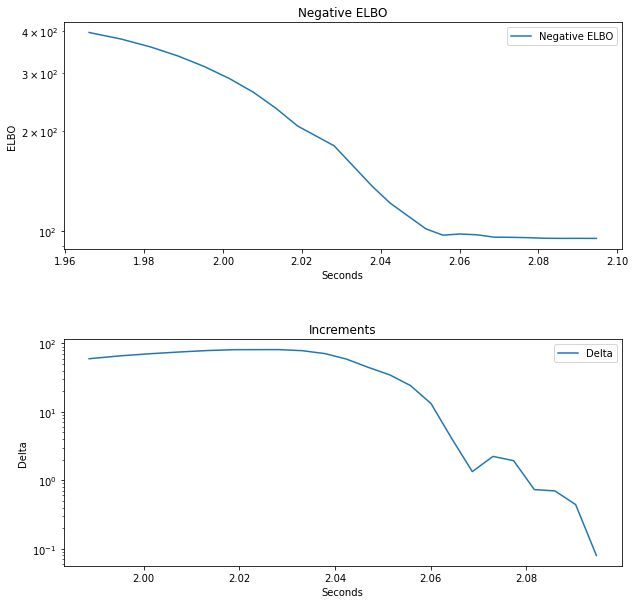

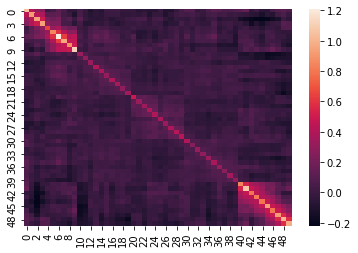

In [145]:
fast = fastPLN()
%time fast.fit(Y,O,cov)
print(fast)

In [116]:
fast.normalized_ELBOs

[-405.5562075657423,
 -388.0962520604903,
 -367.9437982466536,
 -345.77579398393266,
 -322.1095661812157,
 -297.0195867589686,
 -270.6376538790794,
 -243.35906844625487,
 -215.97480122731614,
 -189.30825277432874,
 -164.90304275710653,
 -144.73622582687685,
 -129.88368773241476,
 -118.8718279089826,
 -103.45053311106473,
 -107.04592406890806,
 -106.47707271946354,
 -96.37971902192425,
 -98.27320563804147,
 -98.12747880319498,
 -95.62863850876697,
 -96.0057017970716,
 -95.917674866483,
 -95.08996429832514,
 -95.54716683387932,
 -95.52896313165569,
 -95.10082933487305,
 -95.05729946553038,
 -95.05022361191398,
 -94.98628210225398,
 -94.98257717558845,
 -94.98769768126266,
 -94.98574711714245,
 -94.97788488984014,
 -94.9804207868247,
 -94.97915040588792,
 -94.97558883799815,
 -94.97569837946045,
 -94.97546429616101,
 -94.9746729114194,
 -94.97522890888162,
 -94.97516594157743,
 -94.97460513507409,
 -94.97447938980405,
 -94.97445539225905,
 -94.97441304705266,
 -94.9743995329518,
 -94.9743

In [135]:
pcaC = fastpca.get_C()
pcaSigma = pcaC@(pcaC.T)
#fast.Sigma = pcaSigma
fast.compute_ELBO()/n
#fast.compute_ELBO()
#sns.heatmap(pcaSigma.cpu())

tensor(-1.9375e+13, device='cuda:0', grad_fn=<DivBackward0>)

## Test fastPLNPCA

device  cuda
Initialization ...
nb iteration to find the mode:  181
Initialization finished
Tolerance 0.001 reached in 710 iterations
CPU times: user 2.05 s, sys: 40.1 ms, total: 2.09 s
Wall time: 2.07 s
Last ELBO : -93.20247136842183
Dimension of the latent space : 50


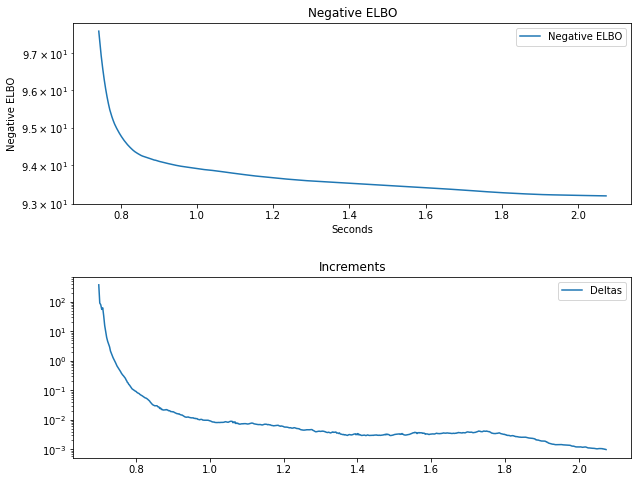

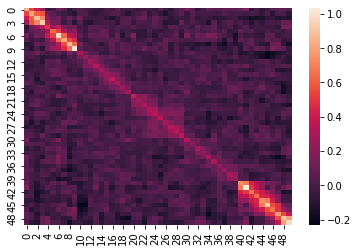

In [143]:
fastpca = fastPLNPCA(q = p)
%time fastpca.fit(Y,O,cov)
print(fastpca)

tensor(-210.3063, device='cuda:0', grad_fn=<DivBackward0>)

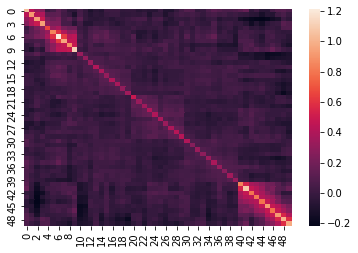

In [142]:
fastC = C_from_Sigma(fast.Sigma, p )
sns.heatmap((fastC@fastC.T).detach().cpu())
fastpca.C = fastC

fastpca.compute_ELBO_PCA()/200

## Test IMPS_PLN

Intialization ...
Initalization done


  0%|          | 1/500 [00:04<40:24,  4.86s/it]

Average log likelihood :  -117.15651980768435


  0%|          | 2/500 [00:08<36:35,  4.41s/it]

Average log likelihood :  -112.65334891244514


  1%|          | 3/500 [00:12<32:53,  3.97s/it]

Average log likelihood :  -110.63577171650866


  1%|          | 4/500 [00:15<29:37,  3.58s/it]

Average log likelihood :  -109.41107507839602


  1%|          | 5/500 [00:18<27:13,  3.30s/it]

Average log likelihood :  -108.61810379565944


  1%|          | 6/500 [00:20<25:36,  3.11s/it]

Average log likelihood :  -108.02916952283088


  1%|▏         | 7/500 [00:23<24:59,  3.04s/it]

Average log likelihood :  -107.6021687931786


  2%|▏         | 8/500 [00:26<24:43,  3.01s/it]

Average log likelihood :  -107.26424881861965


  2%|▏         | 9/500 [00:29<24:54,  3.04s/it]

Average log likelihood :  -105.71067028690948


  2%|▏         | 10/500 [00:32<24:27,  3.00s/it]

Average log likelihood :  -105.27711237120539


  2%|▏         | 11/500 [00:35<24:00,  2.95s/it]

Average log likelihood :  -105.01059412666345


  2%|▏         | 12/500 [00:38<23:41,  2.91s/it]

Average log likelihood :  -104.8668631562843


  3%|▎         | 13/500 [00:41<23:33,  2.90s/it]

Average log likelihood :  -104.7329236998136


  3%|▎         | 14/500 [00:44<23:11,  2.86s/it]

Average log likelihood :  -104.63057247465937


  3%|▎         | 15/500 [00:46<22:51,  2.83s/it]

Average log likelihood :  -104.53648903471277


  3%|▎         | 16/500 [00:49<23:00,  2.85s/it]

Average log likelihood :  -104.45915002226546


  3%|▎         | 17/500 [00:52<23:01,  2.86s/it]

Average log likelihood :  -104.38319421331323


  4%|▎         | 18/500 [00:55<23:49,  2.97s/it]

Average log likelihood :  -104.30350643794429


  4%|▍         | 19/500 [00:58<23:35,  2.94s/it]

Average log likelihood :  -104.26040000328285


  4%|▍         | 20/500 [01:01<23:32,  2.94s/it]

Average log likelihood :  -104.18967751840682


  4%|▍         | 21/500 [01:04<23:16,  2.92s/it]

Average log likelihood :  -104.14504024190089


  4%|▍         | 22/500 [01:07<23:05,  2.90s/it]

Average log likelihood :  -104.1130942652558


  5%|▍         | 23/500 [01:10<23:32,  2.96s/it]

Average log likelihood :  -104.07049805686451


  5%|▍         | 24/500 [01:13<23:44,  2.99s/it]

Average log likelihood :  -104.01733680522952


  5%|▌         | 25/500 [01:16<23:52,  3.02s/it]

Average log likelihood :  -103.99707144577863


  5%|▌         | 26/500 [01:19<23:37,  2.99s/it]

Average log likelihood :  -103.99460313303172


  5%|▌         | 27/500 [01:22<23:16,  2.95s/it]

Average log likelihood :  -103.95983359999329


  6%|▌         | 28/500 [01:25<22:36,  2.87s/it]

Average log likelihood :  -103.94724384999344


  6%|▌         | 29/500 [01:27<22:31,  2.87s/it]

Average log likelihood :  -103.91346139203647


  6%|▌         | 30/500 [01:30<22:04,  2.82s/it]

Average log likelihood :  -103.88762932690236


  6%|▌         | 31/500 [01:33<21:47,  2.79s/it]

Average log likelihood :  -103.86172780927357


  6%|▋         | 32/500 [01:36<22:10,  2.84s/it]

Average log likelihood :  -103.84772235290416


  7%|▋         | 33/500 [01:39<22:58,  2.95s/it]

Average log likelihood :  -103.83182166477816


  7%|▋         | 34/500 [01:42<23:55,  3.08s/it]

Average log likelihood :  -103.79661584671803


  7%|▋         | 35/500 [01:46<24:26,  3.15s/it]

Average log likelihood :  -103.77878984668905


  7%|▋         | 36/500 [01:49<25:09,  3.25s/it]

Average log likelihood :  -103.75489113251976


  7%|▋         | 37/500 [01:52<24:18,  3.15s/it]

Average log likelihood :  -103.74431541139222


  8%|▊         | 38/500 [01:55<23:15,  3.02s/it]

Average log likelihood :  -103.72980227944727


  8%|▊         | 39/500 [01:58<22:50,  2.97s/it]

Average log likelihood :  -103.72214093071175


  8%|▊         | 40/500 [02:01<22:18,  2.91s/it]

Average log likelihood :  -103.71901468685934


  8%|▊         | 41/500 [02:03<22:19,  2.92s/it]

Average log likelihood :  -103.70542591974818


  8%|▊         | 42/500 [02:06<22:13,  2.91s/it]

Average log likelihood :  -103.6975153644614


  9%|▊         | 43/500 [02:09<21:37,  2.84s/it]

Average log likelihood :  -103.68843940540641


  9%|▉         | 44/500 [02:12<21:57,  2.89s/it]

Average log likelihood :  -103.67414894376788


  9%|▉         | 45/500 [02:15<21:57,  2.90s/it]

Average log likelihood :  -103.66709150978197


  9%|▉         | 46/500 [02:18<22:16,  2.94s/it]

Average log likelihood :  -103.65998455569385


  9%|▉         | 47/500 [02:21<22:39,  3.00s/it]

Average log likelihood :  -103.644870667398


 10%|▉         | 48/500 [02:24<22:08,  2.94s/it]

Average log likelihood :  -103.62410750970284


 10%|▉         | 49/500 [02:27<21:37,  2.88s/it]

Average log likelihood :  -103.60289804494829


 10%|█         | 50/500 [02:29<20:54,  2.79s/it]

Average log likelihood :  -103.58728071972054


 10%|█         | 51/500 [02:32<20:57,  2.80s/it]

Average log likelihood :  -103.57905327360146


 10%|█         | 52/500 [02:35<20:57,  2.81s/it]

Average log likelihood :  -103.55960602797659


 11%|█         | 53/500 [02:38<20:52,  2.80s/it]

Average log likelihood :  -103.55760915285167


 11%|█         | 54/500 [02:41<20:54,  2.81s/it]

Average log likelihood :  -103.53028037071793


 11%|█         | 55/500 [02:44<21:19,  2.88s/it]

Average log likelihood :  -103.51761812252607


 11%|█         | 56/500 [02:47<21:48,  2.95s/it]

Average log likelihood :  -103.51076749571344


 11%|█▏        | 57/500 [02:49<21:10,  2.87s/it]

Average log likelihood :  -103.48821497307287


 12%|█▏        | 58/500 [02:52<21:09,  2.87s/it]

Average log likelihood :  -103.48865360969572


 12%|█▏        | 59/500 [02:55<21:14,  2.89s/it]

Average log likelihood :  -103.47893408516217


 12%|█▏        | 60/500 [02:58<21:08,  2.88s/it]

Average log likelihood :  -103.47495463613177


 12%|█▏        | 61/500 [03:01<21:19,  2.91s/it]

Average log likelihood :  -103.45824829103032


 12%|█▏        | 62/500 [03:04<21:12,  2.91s/it]

Average log likelihood :  -103.46280900384733


 13%|█▎        | 63/500 [03:07<20:49,  2.86s/it]

Average log likelihood :  -103.46088072951848


 13%|█▎        | 64/500 [03:09<20:46,  2.86s/it]

Average log likelihood :  -103.45044568511533


 13%|█▎        | 65/500 [03:13<21:23,  2.95s/it]

Average log likelihood :  -103.46074845909627


 13%|█▎        | 66/500 [03:16<22:05,  3.05s/it]

Average log likelihood :  -103.44699221142338


 13%|█▎        | 67/500 [03:19<22:27,  3.11s/it]

Average log likelihood :  -103.44082712929088


 14%|█▎        | 68/500 [03:22<22:47,  3.17s/it]

Average log likelihood :  -103.44583466210275


 14%|█▍        | 69/500 [03:26<22:57,  3.20s/it]

Average log likelihood :  -103.44043251414315


 14%|█▍        | 70/500 [03:29<23:05,  3.22s/it]

Average log likelihood :  -103.43200943482444


 14%|█▍        | 71/500 [03:32<23:13,  3.25s/it]

Average log likelihood :  -103.42565110960379


 14%|█▍        | 72/500 [03:36<23:00,  3.23s/it]

Average log likelihood :  -103.4306310535429


 15%|█▍        | 73/500 [03:39<22:42,  3.19s/it]

Average log likelihood :  -103.42434321089328


 15%|█▍        | 74/500 [03:42<22:07,  3.12s/it]

Average log likelihood :  -103.4189832099697


 15%|█▌        | 75/500 [03:44<21:05,  2.98s/it]

Average log likelihood :  -103.41759620384548


 15%|█▌        | 76/500 [03:47<20:39,  2.92s/it]

Average log likelihood :  -103.3990663092956


 15%|█▌        | 77/500 [03:50<20:32,  2.91s/it]

Average log likelihood :  -103.40049168458717


 16%|█▌        | 78/500 [03:53<20:13,  2.88s/it]

Average log likelihood :  -103.39862376797518


 16%|█▌        | 79/500 [03:55<19:45,  2.82s/it]

Average log likelihood :  -103.39657543886685


 16%|█▌        | 80/500 [03:58<19:08,  2.74s/it]

Average log likelihood :  -103.39379247421473


 16%|█▌        | 81/500 [04:00<18:45,  2.69s/it]

Average log likelihood :  -103.38451773971707


 16%|█▋        | 82/500 [04:03<18:31,  2.66s/it]

Average log likelihood :  -103.38710734309143


 17%|█▋        | 83/500 [04:06<18:12,  2.62s/it]

Average log likelihood :  -103.37838990060916


 17%|█▋        | 84/500 [04:08<18:17,  2.64s/it]

Average log likelihood :  -103.3794851039561


 17%|█▋        | 85/500 [04:11<18:36,  2.69s/it]

Average log likelihood :  -103.37417484562135


 17%|█▋        | 86/500 [04:14<18:41,  2.71s/it]

Average log likelihood :  -103.36825881034787


 17%|█▋        | 87/500 [04:17<18:44,  2.72s/it]

Average log likelihood :  -103.3595297831966


 18%|█▊        | 88/500 [04:19<18:46,  2.74s/it]

Average log likelihood :  -103.35001368312


 18%|█▊        | 89/500 [04:22<18:53,  2.76s/it]

Average log likelihood :  -103.35375546914656


 18%|█▊        | 90/500 [04:25<18:26,  2.70s/it]

Average log likelihood :  -103.3487722224859


 18%|█▊        | 91/500 [04:27<18:22,  2.70s/it]

Average log likelihood :  -103.3484188387668


 18%|█▊        | 92/500 [04:30<18:10,  2.67s/it]

Average log likelihood :  -103.35240816793632


 19%|█▊        | 93/500 [04:33<18:05,  2.67s/it]

Average log likelihood :  -103.34544258788569


 19%|█▉        | 94/500 [04:35<18:07,  2.68s/it]

Average log likelihood :  -103.35066492725127


 19%|█▉        | 95/500 [04:38<18:01,  2.67s/it]

Average log likelihood :  -103.35696416109893


 19%|█▉        | 96/500 [04:41<17:57,  2.67s/it]

Average log likelihood :  -103.35505916895394


 19%|█▉        | 97/500 [04:43<17:49,  2.65s/it]

Average log likelihood :  -103.35963242832047


 20%|█▉        | 98/500 [04:46<17:35,  2.63s/it]

Average log likelihood :  -103.35213135560946
 Criterion updated :  1 / 5


 20%|█▉        | 99/500 [04:49<17:47,  2.66s/it]

Average log likelihood :  -103.33938080641065


 20%|██        | 100/500 [04:51<17:37,  2.64s/it]

Average log likelihood :  -103.33681262646633


 20%|██        | 101/500 [04:54<17:52,  2.69s/it]

Average log likelihood :  -103.33220494943973


 20%|██        | 102/500 [04:57<17:42,  2.67s/it]

Average log likelihood :  -103.33392929828767


 21%|██        | 103/500 [04:59<17:29,  2.64s/it]

Average log likelihood :  -103.33383185325236


 21%|██        | 104/500 [05:02<17:33,  2.66s/it]

Average log likelihood :  -103.33192885831366


 21%|██        | 105/500 [05:05<17:22,  2.64s/it]

Average log likelihood :  -103.3141516260707


 21%|██        | 106/500 [05:07<17:25,  2.65s/it]

Average log likelihood :  -103.31075805907005


 21%|██▏       | 107/500 [05:10<17:14,  2.63s/it]

Average log likelihood :  -103.3187249130854


 22%|██▏       | 108/500 [05:12<17:12,  2.64s/it]

Average log likelihood :  -103.31491567596126


 22%|██▏       | 109/500 [05:15<17:10,  2.63s/it]

Average log likelihood :  -103.31519090590778


 22%|██▏       | 110/500 [05:18<17:20,  2.67s/it]

Average log likelihood :  -103.30492630344287


 22%|██▏       | 111/500 [05:20<17:07,  2.64s/it]

Average log likelihood :  -103.29498578193514


 22%|██▏       | 112/500 [05:23<16:50,  2.61s/it]

Average log likelihood :  -103.28688274257814


 23%|██▎       | 113/500 [05:26<16:54,  2.62s/it]

Average log likelihood :  -103.28645724169367


 23%|██▎       | 114/500 [05:28<17:00,  2.64s/it]

Average log likelihood :  -103.28658134280704


 23%|██▎       | 115/500 [05:31<16:59,  2.65s/it]

Average log likelihood :  -103.27879389545471


 23%|██▎       | 116/500 [05:34<16:54,  2.64s/it]

Average log likelihood :  -103.2730062855521


 23%|██▎       | 117/500 [05:36<16:48,  2.63s/it]

Average log likelihood :  -103.27116235975754


 24%|██▎       | 118/500 [05:39<16:52,  2.65s/it]

Average log likelihood :  -103.26471136132074


 24%|██▍       | 119/500 [05:42<16:50,  2.65s/it]

Average log likelihood :  -103.2629942125588


 24%|██▍       | 120/500 [05:44<16:39,  2.63s/it]

Average log likelihood :  -103.2688168788856


 24%|██▍       | 121/500 [05:47<16:30,  2.61s/it]

Average log likelihood :  -103.2610808380939


 24%|██▍       | 122/500 [05:49<16:34,  2.63s/it]

Average log likelihood :  -103.26311100559576


 25%|██▍       | 123/500 [05:52<16:28,  2.62s/it]

Average log likelihood :  -103.26335188713448


 25%|██▍       | 124/500 [05:54<16:09,  2.58s/it]

Average log likelihood :  -103.26797781690576


 25%|██▌       | 125/500 [05:57<16:12,  2.59s/it]

Average log likelihood :  -103.27707098373202


 25%|██▌       | 126/500 [06:00<16:41,  2.68s/it]

Average log likelihood :  -103.27891112501862
 Criterion updated :  2 / 5


 25%|██▌       | 127/500 [06:03<16:36,  2.67s/it]

Average log likelihood :  -103.2858142503811
 Criterion updated :  3 / 5


 26%|██▌       | 128/500 [06:05<16:23,  2.64s/it]

Average log likelihood :  -103.28283789250958
 Criterion updated :  4 / 5


 26%|██▌       | 128/500 [06:08<17:50,  2.88s/it]

Average log likelihood :  -103.29549549340382
 Criterion updated :  5 / 5
Algorithm stopped after  128  iterations
Max likelihood: -103.2610808380939


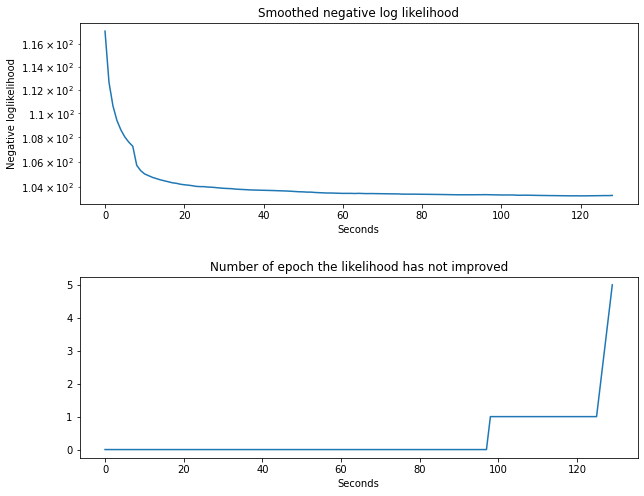

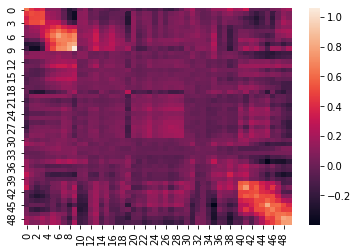

In [11]:
imps = IMPS_PLN(q = 5)
imps.fit(Y,O,cov, batch_size = 5, verbose = True, nb_plateau = 5, acc = 0.5 )
print(imps)

In [15]:
print('beta : ', imps.get_beta())
print('Sigma:', imps.get_Sigma())
print('C : ', imps.get_C())

beta :  tensor([[ 0.5319, -0.1286, -0.9118,  0.2196, -0.5501,  0.7098, -0.0512,  0.1287,
          0.5618,  0.6380, -0.1822, -0.0517, -1.0352, -1.4089, -1.0043, -0.9508,
         -1.5333, -0.7870, -0.2195,  1.3637, -0.5500, -0.3784,  0.4841, -1.3099,
          0.9395, -0.0897, -0.9752, -0.6879,  0.7681,  0.0425, -0.0818, -1.1697,
         -0.0794,  0.0716,  0.1251, -1.3632,  1.2246, -0.2534,  2.3016, -0.1352,
          0.1280, -0.3523,  0.5177, -0.7209, -0.1243,  0.5502,  0.7485,  0.3261,
         -1.0124, -0.2889],
        [-0.3688,  0.6966, -0.0611,  0.3833, -1.0528, -0.9435, -0.0092,  0.0033,
         -0.8806, -0.8904, -0.5710, -0.7291,  0.4935, -0.3190, -0.3351,  0.2781,
         -0.2219, -0.0509, -0.1223, -0.0372, -0.7687, -1.3786,  0.3807, -0.3960,
         -0.4027, -0.8715, -0.3271,  0.2408, -0.2199,  0.2229,  0.3529, -0.1587,
         -0.6257,  0.6852, -0.7469,  0.1797,  0.2518, -0.5882, -0.0730, -0.5182,
          0.5133,  0.5887,  0.1786,  0.5281, -0.6902,  1.6824,  0.5284, -

## True value of Sigma 

<AxesSubplot:>

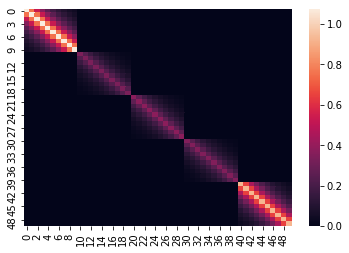

In [16]:
sns.heatmap(true_Sigma)

<AxesSubplot:>

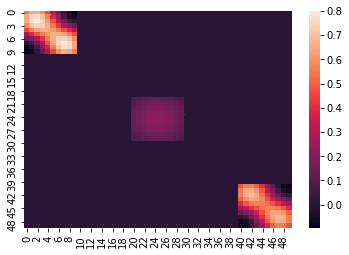

In [18]:
true_C = C_from_Sigma(true_Sigma, 5)
sns.heatmap(true_C@(true_C.T))